###### <img src="../resources/cropped-SummerWorkshop_Header.png">  

<h1 align="center">Regression Tutorial SWDB 2022 </h1> 
<h3 align="center">Friday, August 26, 2022</h3> 

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
<p>
Machine learning has many canonical problem types that we will discuss in these tutorials.  These include Regression, Classification, Clustering, and Dimension Reduction.  This tutorial is focused on Regression.
</p>
<p>
    Regression is an example of a Supervised Learning problem.  In a regression problem, we are given $N$ pairs of data points $(\vec{x}_i, y_i)$ where $i \in [1,N]$.  We want to develop a function $f(\vec{x})$ such that $f(\vec{x}_i)\approx y_i$ for each pair of points in the data set. The purpose of this function is to provide us with a model of how the data points $\vec{x}_i$ affect $y_i$. This allows us to learn the degree to which $\vec{x}_i$ has predictive power of $y_i$ and can tell you whether and how these data are correlated with each other.
    </p>
    <p>
    The simplest regression problem is linear regression, in which we try to create the function $f$ by linearly combining a set of functions that act on the points $x$.

$f(\vec{x}_i) = \sum_j w_j \phi(\vec{x}_i)$

The functions $\phi(\vec{x})$ are chosen according to the analysis.  They are often called "features".  The coefficients $w_j$ are called "weights". You may be familiar with a simple version of linear regression, where the functions $\phi$ are chosen to be the identity and a constant.  When the input space is also one dimensional, our function to fit becomes:

$f(x) = w x + b$
</p>
<p>
    This problem is solved by minimizing an "error function" function $E$ such that $f$ most closely approximates the data points $y_i$ on the inputs $\vec{x}_i$.  This error function is simply the squared difference between $y$ and $f(\vec{x})$.

$E = \frac{1}{2} \sum_i \left | y_i - f\left ( \vec{x}_i \right ) \right |^2 = \frac{1}{2} \sum_i \left | y_i - \sum_j w_j \phi (\vec{x}_i ) \right |^2 $
</p>
<p>
    This particular problem has an exact analytic solution that is easy to implement, but in this tutorial, we will look at how to perform regression using the `scikit-learn` Python package.  `scikit-learn` has many regression algorithms in common use built in, most of which do not have simple analytic solutions.  In addition, other packages have adopted the `scikit-learn` style interface.  One advantage of this is that multiple algorithms can be deployed with the same code.

The `scikit-learn` website:  http://scikit-learn.org/stable/
</p>
</div>

In [1]:
# import general packages we'll need in this tutorial

import numpy as np
import matplotlib.pyplot as plt
import os

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
<p>
We're going to provide a simple example with fake data and then use the same model to fit data from the Brain Observatory.  We will attempt to model the data using an $n$th order polynomial of a single variable:
</p>
<p>
$f_n(x) = \sum_{i=0}^n a_i x^i$
</p>
<p>
i.e.
</p>
<p>
$f_1(x) = a_0 + a_1 x$
</p>
<p>
$f_2(x) = a_0 + a_1 x + a_2x^2$
</p>
<p>
$\dots$
</p>
<p>
First we generate some example data.  This will be the true model of the data.  (In a real problem, we won't know this function; we're trying to fit it.)
</p>
<p>
$F(x) = sin(2\pi x)$
</p>
</div>

Text(0.5, 0, 'x')

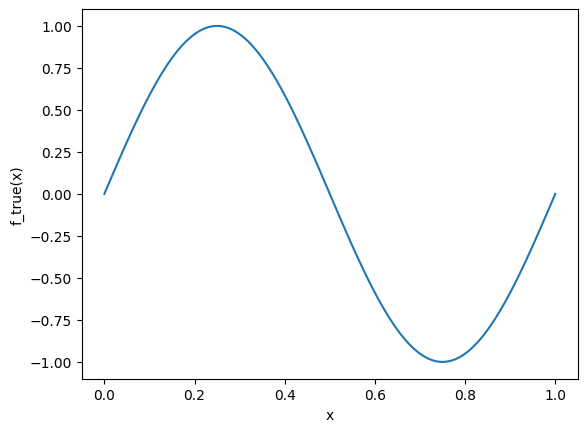

In [2]:
x_bins = np.linspace(0,1.0, 100)

def f_true(xt): 
    return np.sin(2.0*np.pi*xt)

fig, ax = plt.subplots()
ax.plot(x_bins, f_true(x_bins))
ax.set_ylabel('f_true(x)')
ax.set_xlabel('x')

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
<p>
Now we generate some 'data' from this function.
    </p>
    </div>

Text(0.5, 0, 'x')

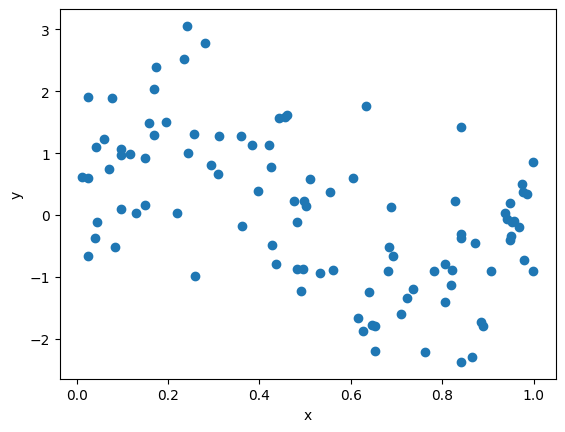

In [3]:
n = 100

x = np.sort(np.random.random(n))
y = f_true(x) + 1.0*np.random.normal(size=n)

fig, ax = plt.subplots()
ax.plot(x, y, 'o')
ax.set_ylabel('y')
ax.set_xlabel('x')

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
<p>
<h3>Fitting a first order polynomial.</h3>
</p>
<p>
Before we fit any models, we need to separate the data into train, validate, and test sets.  This is so that we can train the model (train), perform comparisons between different models and select the most appropriate one (validate), and test the performance of our finalmodel (test).
</p>
<p>
`scikit-learn` has a function we can use called `train_test_split`.  We use this function twice in order to generate a validation set. Note how we split the data in half to create our training set, and split the remainder in half again to create the validation and testing sets.
</p>
</div>

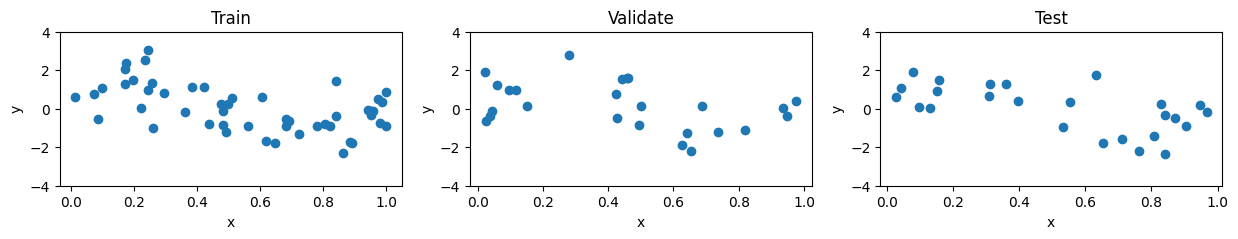

In [4]:
from sklearn.model_selection import train_test_split

x_train, x_validate, y_train, y_validate = train_test_split(x, y, train_size=0.5)
x_validate, x_test, y_validate, y_test = train_test_split(x_validate, y_validate, test_size=0.5)

fig, ax = plt.subplots(1,3, figsize=(15,2))
ax[0].plot(x_train, y_train, 'o')
ax[1].plot(x_validate, y_validate, 'o')
ax[2].plot(x_test, y_test, 'o')

ax[0].set_title('Train')
ax[1].set_title('Validate')
ax[2].set_title('Test')

for i in range(3):
    ax[i].set_ylim(-4, 4)
    ax[i].set_xlabel('x')
    ax[i].set_ylabel('y')

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
<p>
In ordert to fit the model, we need to create the object that will manage the fitting.  We are going to use the `LinearRegression` model from `sklearn.linear_model`.  Fitting works by calling the `fit` method with the data.
</p>
</div>

In [ ]:
from sklearn.linear_model import LinearRegression

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
<p>
We reshape `x` in the `fit` method because it expects a two dimensional array of shape (samples, dimensions).
</p>
</div>

In [ ]:
regression = LinearRegression()
regression.fit(x_train.reshape(-1, 1), y_train)

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
<p>
Now we compare the result to the validation set. Calling the "predict" method in our linear regression object will return $f(x)$ given the passed $x$. In other words, it will predict what are the data points $y$ you ought to observe given the data points $x$. We will plot the points predicted by the model together with the points in our validation set to see how well the model performed.
</p>
</div>

In [ ]:
fig, ax = plt.subplots()
ax.plot(x_validate, y_validate, 'o')
predicted_y = regression.predict(x_bins.reshape(-1,1))
ax.plot(x_bins.reshape(-1,1), predicted_y, '-')
ax.set_ylabel('y')
ax.set_xlabel('x')
ax.set_ylim(-4,4)

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
<p>
That's ok, but we could clearly do better.  Let's try multiple orders of polynomials so that we can compare them with the validation set.
</p>
<p>
     We define a function `nth_polynomial` in order to create input data whose rows are data points and whose columns are the terms in the polynomial ($x$, $x^2$, $x^3$, $\dots$)
</p>
</div>

In [ ]:
def nth_polynomial(x, n):
    return np.stack([x**i for i in range(1, n+1)], axis=1)

In [ ]:
max_order = 9

regression_list = [LinearRegression() for ind in range(max_order)]
for ind, regression in enumerate(regression_list):
    x_nth = nth_polynomial(x_train, ind+1)
    regression.fit(x_nth, y_train)
    
fig, ax = plt.subplots(3,3, figsize=(15,15))

for ind, regression in enumerate(regression_list):
    xi = ind%3
    yi = ind//3
    x_nth = nth_polynomial(x_bins, ind+1)
    ax[yi, xi].plot(x_train, y_train, 'o')
    ax[yi, xi].plot(x_bins, regression.predict(x_nth))
    ax[yi, xi].set_xlabel('x')
    ax[yi, xi].set_ylabel('y')
    ax[yi, xi].set_title('order '+str(i+1))

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
<p>
Here are the models of various degree plotted against the training set. It seems like the fit improves as the order improves, but beware! Using a model with too many parameters for your data may improve the fit for your training set, but your model may become so finely tuned to the training set in particular that it is not generalizable. This is a problem known as "overfitting."
</p>
<p>
To demonstrate, we plot these models against the validation set.
</p>
</div>

In [ ]:
fig, ax = plt.subplots(3,3, figsize=(15,15))

for ind, regression in enumerate(regression_list):
    xi = ind%3
    yi = ind//3
    x_nth = nth_polynomial(x_bins, ind+1)
    ax[yi, xi].plot(x_validate, y_validate, 'o')
    ax[yi, xi].plot(x_bins, regression.predict(x_nth))
    ax[yi, xi].set_xlabel('x')
    ax[yi, xi].set_ylabel('y')
    ax[yi, xi].set_title('order '+str(ind+1))

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
<p>
To quantify how well each of these models performs, we calculate the $R^2$ of the fit by calling the "score" method for each regression.
</p>
</div>

In [ ]:
R2_vals = []

for ind, regression in enumerate(regression_list):
    x_nth = nth_polynomial(x_validate, ind+1)
    R2 = regression.score(x_nth, y_validate)
    R2_vals.append(R2)

order = np.arange(1,max_order+1)
fig, ax = plt.subplots(1,3, figsize=(15,2))
ax[0].plot(order, R2_vals)
ax[0].set_ylabel('Validation $R^2$')
ax[0].set_xlabel('polynomial order')

best_model_index = np.argmax(R2_vals)
regression_best = regression_list[best_model_index]

ax[1].plot(x_validate, y_validate, 'o')
x_nth = nth_polynomial(x_bins, best_model_index+1)
ax[1].plot(x_bins, regression_best.predict(x_nth))
ax[1].set_ylabel('y_validate')
ax[1].set_xlabel('x_validate')


ax[2].plot(x_test, y_test, 'o')
ax[2].plot(x_bins, regression_best.predict(x_nth))
ax[1].set_ylabel('y_test')
ax[1].set_xlabel('x_test')

print("Best model is order:  {}".format(best_model_index+1))

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
<p>
<h2>Cross validation</h2>
<p>
We just used our "validation" data set to try to determine how well each of our models ggeneralizes to other data, but in fact, <code>scikit-learn</code> has built-in functions to make validation very simple! We can use our training data set to perform <b>cross validation</b>, where our model is fit multiple times on different subsets of the training data and the performance is compared across all subsets. This is similar to what we did above when we compared the training data to the validation data, and allows us to measure how consistent our model is.
</p>
<p>
    Here, we perform cross validation with the functions <code>cross_validate</code> and <code>KFold</code>. <code>cross_validate</code> performs cross validation and returns a dictionary of scores over folds. <code>KFold</code> provides an iterator that produces indices that split the data into train and test folds.
</p>
<p>
In the following, we'll ignore the data set we labeled "validate" above. In fact, this additional data set is unneccessary as data used for validation is part of the cross validation separation of the training set in the code below. In the future, you only need to split your data into training and testing sets!
</p>
</div>

In [ ]:
from sklearn.model_selection import cross_validate

In [ ]:
cv_mean_error = np.zeros_like(regression_list)

for ind, regression in enumerate(regression_list):
    x_nth = nth_polynomial(x_train, ind+1)
    cv_dict = cross_validate(regression, x_nth, y_train, cv=4)
    cv_mean_error[ind] = np.mean(cv_dict['test_score'])
    
fig, ax = plt.subplots()
ax.plot(cv_mean_error)
ax.set_ylabel('Cross Validation $<R^2>$')
ax.set_xlabel('polynomial order')

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
<p>
We can do the same analysis with `KFold`.
</p>
</div>

In [ ]:
from sklearn.model_selection import KFold

In [ ]:
folds = KFold(n_splits=4)

scores = np.zeros_like(regression_list)

for ind, regression in enumerate(regression_list):
    scores_temp = []
    for train, test in folds.split(x_train):
        x_nth = nth_polynomial(x_train[train], ind+1)
        regression.fit(x_nth, y_train[train])
        x_nth = nth_polynomial(x_train[test], ind+1)
        scores_temp.append(regression.score(x_nth, y_train[test]))
    scores[ind] = np.mean(scores_temp)
        

fig, ax = plt.subplots()
ax.plot(scores)
ax.set_ylabel('Cross Validation $<R^2>$')
ax.set_xlabel('polynomial order')
# ax.set_ylim(-0.25, 0.25)

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
<p>
Now that we know the best model, we can apply it to the test data.
</p>
</div>

In [ ]:
best_model_index = np.argmax(scores)
regression_best = regression_list[best_model_index]
x_nth = nth_polynomial(x_train, best_model_index+1)
regression_best.fit(x_nth, y_train)

fig, ax = plt.subplots()
ax.plot(x_test, y_test, 'o')
x_nth = nth_polynomial(x_bins, best_model_index+1)
ax.plot(x_bins, regression_best.predict(x_nth))
ax.set_ylabel('y_test')
ax.set_xlabel('x_test')

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
<p>
Now let's try a simple example with the Allen Brain Observatory Visual Behavior Dataset.  We will try regressing the neural activity in the midbrain reticular nucleus (MRN) against the running speed of the animal.  
</p>
</div>

In [ ]:
import allensdk
from allensdk.brain_observatory.\
    behavior.behavior_project_cache.\
    behavior_neuropixels_project_cache \
    import VisualBehaviorNeuropixelsProjectCache
import os
import platform
platstring = platform.platform()

data_dirname = 'visual-behavior-neuropixels'
use_static = False
if 'Darwin' in platstring or 'macOS' in platstring:
    # macOS 
    data_root = "/Volumes/Brain2022/"
elif 'Windows'  in platstring:
    # Windows (replace with the drive letter of USB drive)
    data_root = "E:/"
elif ('amzn' in platstring):
    # then on AWS
    data_root = "/data/"
    data_dirname = 'visual-behavior-neuropixels-data'
    use_static = True
else:
    # then your own linux platform
    # EDIT location where you mounted hard drive
    data_root = "/media/$USERNAME/Brain2022/"

# get the cache location
cache_dir = os.path.join(data_root, data_dirname)


#cache = VisualBehaviorNeuropixelsProjectCache.from_s3_cache(cache_dir=cache_dir)
cache = VisualBehaviorNeuropixelsProjectCache.from_local_cache(
            cache_dir=cache_dir, use_static_cache=use_static)

In [ ]:
# We need to find which units have the sessions we are interested in, so we will need the units and sessions tables.
units_table = cache.get_unit_table()
ecephys_sessions_table = cache.get_ecephys_session_table()

# First, we want to find a "Good" Session to look at;
# For now, we are going to grab the one with the most MRN units.
unit_by_session = units_table.join(ecephys_sessions_table,on = 'ecephys_session_id')
unit_in = unit_by_session[(unit_by_session['structure_acronym']=='MRN') & (unit_by_session['experience_level']=='Familiar')]
unit_count = unit_in.groupby(["ecephys_session_id"]).count()
familiar_session_with_most_in_units = unit_count.index[np.argmax(unit_count['ecephys_probe_id'])]
familiar_session_with_most_in_units

# Actually import the data
session = cache.get_ecephys_session(ecephys_session_id=familiar_session_with_most_in_units)

In [ ]:
# Get unit information
session_units = session.get_units()
# Channel information
session_channels = session.get_channels()
# And associate each unit with the channel on which it was found with the largest amplitude
units_by_channels= session_units.join(session_channels,on = 'peak_channel_id')

# Filter for good units in MRN
this_units = units_by_channels[(units_by_channels.structure_acronym == 'MRN')\
                               &(units_by_channels['isi_violations']<0.5)\
                               &(units_by_channels['amplitude_cutoff']<0.1)\
                               &(units_by_channels['presence_ratio']>0.95)]
# Get the spiketimes from these units as a dictionary
this_spiketimes = dict(zip(this_units.index, [session.spike_times[ii] for ii in this_units.index]))

Next, we'll take all the spikes that were recorded in the MRN. This is more-or-less like taking "multi-unit" activity from this area.

In [ ]:
# Get the running speed data from this same time interval
from scipy.interpolate import interp1d

running_timestamps = session.running_speed.timestamps
running_speed = session.running_speed.speed[:-1]

# Bin the spiking data from all MRN neurons
all_counts = np.zeros((len(this_units),len(running_timestamps)-1))
for ind, unit in enumerate(this_units.index):
    unit_spiketimes = this_spiketimes[unit]
    all_counts[ind,:] = np.histogram(unit_spiketimes,running_timestamps)[0]

# Average the spike rates to get multiunit activity   
avg_spike_counts = np.mean(all_counts, axis=0)
avg_spike_rates = avg_spike_counts/np.diff(running_timestamps)

In [ ]:
all_counts.shape

In [ ]:
# Look only at the data during active behavior
# Don't run this cell if you want to look at the entire recording session!

active_stims = session.stimulus_presentations[session.stimulus_presentations.stimulus_block==0 ]

# Get the start and end time of active behavior
session_start_time = np.min(active_stims.start_time)
session_end_time = np.max(active_stims.start_time) 

# Get the running and spike data during this period
active_inds = np.searchsorted(running_timestamps, [session_start_time, session_end_time])

running_speed = running_speed[active_inds[0]:active_inds[1]]
avg_spike_rates = avg_spike_rates[active_inds[0]:active_inds[1]]
all_counts = all_counts[:,active_inds[0]:active_inds[1]]

In [ ]:
fig, ax = plt.subplots(3,1,figsize=(30, 20))

ax[0].plot(running_timestamps[:1000],running_speed[:1000])
ax[0].set_ylabel('Speed (cm/s)')
ax[0].set_xlabel('Time (s)')

ax[1].plot(running_timestamps[:1000],avg_spike_rates[:1000])
ax[1].set_ylabel('Spike rate (spk/s)')
ax[1].set_xlabel('Time (s)')

ax[2].plot(avg_spike_rates[:1000], running_speed[:1000], 'o')
ax[2].set_ylabel('Speed (cm/s)')
ax[2].set_xlabel('Spike rate (spk/s)')

Unsurprisingly, the spike rates are a little discretized. This is because the time bins used (the same ones from the running data) are short enough that only a handful of spikes make it into each bin, so the spike count data is very discrete.

You will notice that thinking of running speed as continuous may also not be the "best" way to go about analysis; perhapse we should consider it as a binary (running v. not running) variable. We will go over how to build this type of model in the classification tutorial!

Still, perhaps there is a correlation here!

In [ ]:
spikes_train, spikes_test, run_train, run_test = train_test_split(avg_spike_rates[:1000], running_speed[:1000], train_size=0.75)

fig, ax = plt.subplots(1,2, figsize=(15,2))
ax[0].plot(spikes_train, run_train, 'o')
ax[1].plot(spikes_test, run_test, 'o')

ax[0].set_title('Train')
ax[1].set_title('Test')

for i in range(2):
    #ax[i].set_ylim(-4, 4)
    ax[i].set_xlabel('Spike rates (spks/s)')
    ax[i].set_ylabel('Running Speed (cm/s)')

Remember, we don't need a separate validation set if we make use of the cross validation tools!

Try changing the bin numbers in the cell below.

In [ ]:
lr_order1 = LinearRegression()
lr_order1.fit(spikes_train.reshape(-1, 1), run_train)

In [ ]:
lr_order1.intercept_, lr_order1.coef_

In [ ]:
x_bins = np.linspace(np.min(spikes_train), np.max(spikes_train), 100)

fig, ax = plt.subplots()
ax.plot(spikes_train, run_train, 'o', ms=1)
ax.plot(x_bins, lr_order1.predict(x_bins.reshape(-1,1)))
ax.set_xlabel('Spike Rate (spk/s)')
ax.set_ylabel('Running Speed (cm/s)')

In [ ]:
max_order = 9

lr_list = [LinearRegression() for ind in range(max_order)]
for ind, lr in enumerate(lr_list):
    spikes_nth_order = nth_polynomial(spikes_train, ind+1)
    lr.fit(spikes_nth_order, run_train)

In [ ]:
fig, ax = plt.subplots(3,3, figsize=(15,15))

for ind, lr in enumerate(lr_list):
    xi = ind%3
    yi = ind//3
    x_nth_order = nth_polynomial(x_bins, ind+1)
    ax[yi, xi].plot(spikes_train, run_train, 'o')
    ax[yi, xi].plot(x_bins, lr.predict(x_nth_order),'o')
    ax[yi, xi].set_xlabel('Spike Rate (spks/s)')
    ax[yi, xi].set_ylabel('Running Speed (cm/s)')
    ax[yi, xi].set_ylim((-20, 100))

In [ ]:
cv_mean_error = np.zeros_like(lr_list)

for ind, regression in enumerate(lr_list):
    x_nth = nth_polynomial(spikes_train, ind+1)
    cv_dict = cross_validate(regression, x_nth, run_train, cv=4)
    cv_mean_error[ind] = np.mean(cv_dict['test_score'])
    
fig, ax = plt.subplots()
ax.plot(cv_mean_error)
ax.set_ylabel('Cross Validation $<R^2>$')
ax.set_xlabel('polynomial order')

In [ ]:
best_model_index = np.argmax(cv_mean_error)
regression_best = lr_list[best_model_index]
x_nth = nth_polynomial(spikes_train, best_model_index+1)
regression_best.fit(x_nth, run_train)

fig, ax = plt.subplots()
ax.plot(spikes_test, run_test, 'o')
x_nth = nth_polynomial(x_bins, best_model_index+1)
ax.plot(x_bins, regression_best.predict(x_nth))
ax.set_ylabel('Running Speed (cm/s)')
ax.set_xlabel('Spike Rate (spk/s)');

#### Exercise: Remember, the training set can be multi-dimensional! 
#### Try using a matrix of spike rates for every neuron as your training data, rather than the average spike rate across all neurons. How does it do at predicting running speed over time? Plotting the predicted running speed vs actual running speed to find out on some held out data.